### Ансамбли. Случайный Лес (Random Forest).
Ансамбль — это некая совокупность, части которой образуют единое целое. В машинном обучении тоже существуют ансамбли - ансамбли моделей. Идея заключается в том, чтобы использовать имеющиеся модели вместе и получать более высокое качество, чем могла бы показать каждая из моделей в отдельности.

**Бэггинг (bagging)**

Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман Лео Брейманом в 1994 году. Бэггинг основан на статистическом методе **бутстрэпа (bootstrap)**, который позволяет оценивать многие статистики сложных распределений. *Суть бутстрэпа состоит в следующем*: пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Например, можно рассмотреть мешок с шариками: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков (из-за возвращения среди выбранных объектов окажутся повторы). Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

<center><img src="data//bootstrap.jpg" alt="drawing" width="800"/></center>




Теперь перейдем непосредственно к Бэггингу. Пусть имеется обучающая выборка $\large X$. С помощью бутстрэпа сгенерируем из неё выборки $\large X_1, \dots, X_M$. Теперь на каждой выборке обучим свой классификатор $\large a_i(x)$. Итоговый классификатор будет усреднять ответы всех этих алгоритмов (в случае классификации это соответствует голосованию): 
$$\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$$

<center><img src="data//bagging_scheme.png" alt="drawing" width="800"/></center>

Рассмотрим задачу регрессии с базовыми алгоритмами $\large b_1(x), \dots , b_n(x)$. Предположим, что существует истинная функция ответа для всех объектов $\large y(x)$, а также задано распределение на объектах $\large p(x)$. В этом случае мы можем записать ошибку каждой функции регрессии

$$\large \varepsilon_i(x) = b_i(x) - y(x), i = 1, \dots, n$$
матожидание среднеквадратичной ошибки будет иметь вид:
$$ \mathbb{E}_x\left[\left(b_i(x) - y(x)\right)^{2}\right] = \mathbb{E}_x\left[\varepsilon_i^{2}(x)\right]. $$
Средняя ошибка построенных функций регрессии в свою очередь записывается как:

$$ \large \mathbb{E}_1 = \frac{1}{n}\mathbb{E}_x \sum_{i=1}^n \varepsilon_i^{2}(x) $$

Предположим, что ошибки несмещены и некоррелированы:

$$ \large \begin{array}{rcl} \mathbb{E}_x\varepsilon_i(x) &=& 0, \\ \mathbb{E}_x\varepsilon_i(x)\varepsilon_j(x) &=& 0, i \neq j. \end{array} $$

Построим теперь новую функцию регрессии, которая будет усреднять ответы построенных нами функций:

$$ \large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x) $$

Найдем ее среднеквадратичную ошибку:

$$ \large 
\begin{array}
{rcl}\mathbb{E}_n &=& \mathbb{E}_x\Big(\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\Big)^2 \\ &=& \mathbb{E}_x\Big(\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\Big)^2 \\ &=& \frac{1}{n^2}\mathbb{E}_x\Big(\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\Big) \\ &=& \frac{1}{n}\mathbb{E}_1
\end{array}$$

Таким образом, усреднение ответов позволило уменьшить средний квадрат ошибки в $n$ раз.



Если рассмотрим общую ошибку, то ее разложение на три компоненты - шум, смещение и разброс - имеет вид:

$$\large \begin{array}{rcl} \text{Err}\left(\vec{x}\right) &=& \mathbb{E}\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\
 &=& \sigma^2 + f^2 + \text{Var}\left(\hat{f}\right) + \mathbb{E}\left[\hat{f}\right]^2 - 2f\mathbb{E}\left[\hat{f}\right] \\ 
 &=& \left(f - \mathbb{E}\left[\hat{f}\right]\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \\ 
 &=& \text{Bias}\left(\hat{f}\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \end{array}$$

Это разложение называется **bias-variance decomposition**, и оно является одним из мощных средств для анализа работы ансамблей.
- Смещение, $Bias(\hat{f})$ - средняя ошибка по всевозможным наборам данных
- Дисперсия (разброс), $Var(\hat{f})$ - вариативность ошибки, то, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных
- Неустранимая ошибка, $\sigma^2$

В идеалном случае, конечно же, хотелось бы свести на нет смещение и дисперсия (с неустранимой ошибкой ничего сделать не можем), но на практике часто приходится балансировать между смещенными и нестабильными оценками (высокая дисперсия).

<center><img src="data//bias_variance.png" alt="drawing" width="500"/></center>

**Бэггинг** позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

**Out-of-bag error**

При использовании случайных лесов нет необходимости в кросс-валидации или в отдельном тестовом наборе, чтобы получить несмещенную оценку ошибки набора тестов. Каждое дерево строится с использованием разных образцов бутстрэпа из исходных данных. Примерно $37\%$ примеров остаются вне выборки бутстрэпа и не используются при построении k-го дерева.
<details>
<summary>Доказательство</summary>

Пусть в выборке $\large \ell$ объектов. На каждом шаге все объекты попадают в подвыборку с возвращением равновероятно, т.е отдельный объект — с вероятностью $\large\frac{1}{\ell}.$ Вероятность того, что объект НЕ попадет в подвыборку (т.е. его не взяли $\large \ell$ раз): $\large (1 - \frac{1}{\ell})^\ell$. При $\large \ell \rightarrow +\infty$ получаем один из "замечательных" пределов $\large \frac{1}{e}$. Тогда вероятность попадания конкретного объекта в подвыборку $\large \approx 1 - \frac{1}{e} \approx 63\%$.
</details>

Получается, что каждый базовый алгоритм обучается на $\approx63 \%$ исходных объектов. Значит, на оставшихся $\approx37 \%$ его можно сразу проверять. Out-of-Bag оценка — это усредненная оценка базовых алгоритмов на тех $\approx37 \%$ данных, на которых они не обучались.

**Случайный лес (Random Forest)** 

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. Метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом.

Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:

- Пусть количество объектов для обучения равно $\large N$, а количество признаков $\large D$.
- Выберите $\large L$ как число отдельных моделей в ансамбле.
- Для каждой отдельной модели $\large l$ выберите $\large dl (dl < D) $ как число признаков для $\large l$. Обычно для всех моделей используется только одно значение $\large dl$.
- Для каждой отдельной модели $\large l$ создайте обучающую выборку, выбрав $\large dl$ признаков из $\large D$, и обучите модель.
- Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $\large L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.

Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:

Для каждого $\large n = 1\dots, N$:
- Сгенерировать выборку $\large X_n$ с помощью бутстрэпа;
- Построить решающее дерево $\large b_n$ по выборке $\large X_n$:
    1. по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
    2. дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева
    3. при каждом разбиении сначала выбирается $\large m$ случайных признаков из $\large n$ исходных,
и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$. Для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

**Плюсы алгоритма:**
- Сильный алгоритм, имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга
- Практически не чувствителен к выбросам в данных из-за случайного сэмплирования
- Устойчив к шумам, не требует масштабирования признаков
- Редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, после достижения определенного количества деревьев, кривая обучения выходит на асимптоту
- Высокая параллелизуемость и масштабируемость
   
**Минусы алгоритма:**
- Деревья могут долго обучаться из-за большой глубины; соответственно из-за большой глубины долго строятся предсказания
- Алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков
- В отличие от одного дерева, результаты случайного леса сложнее интерпретировать

### Random Forest в Scikit-learn

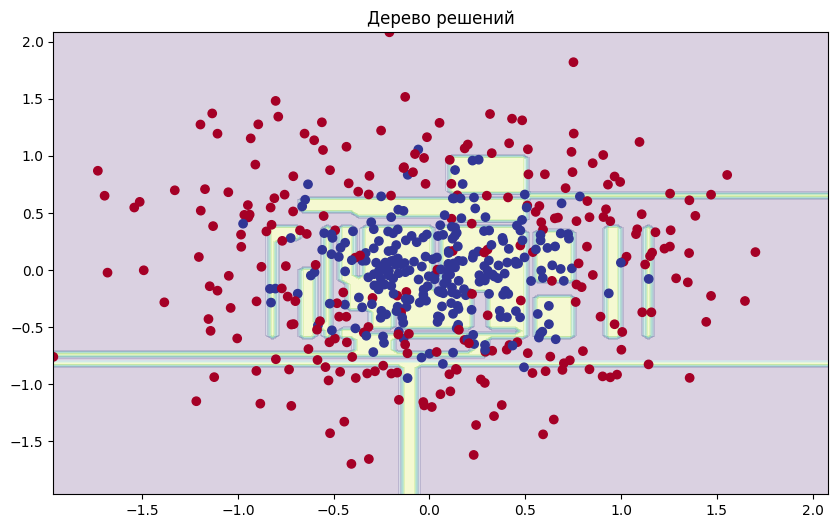

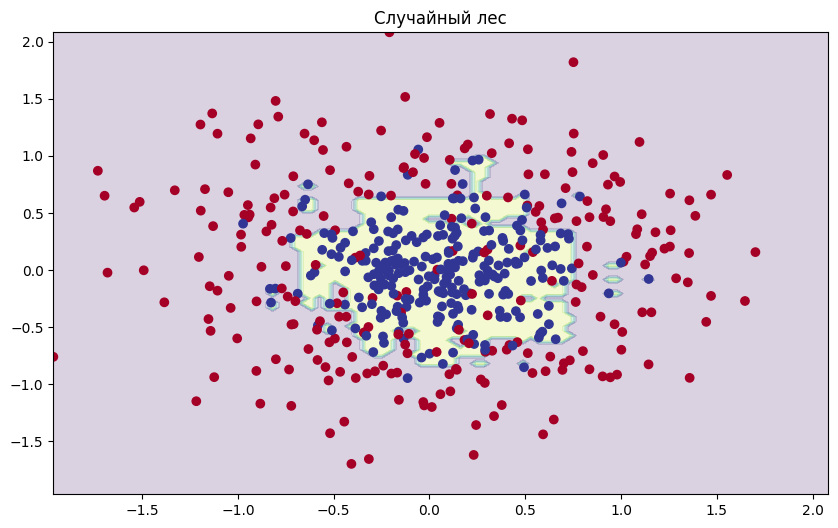

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 6


np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)
# Decision trees
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Дерево решений")
plt.show()
# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Случайный лес")
plt.show()

Из рисунков видно, что разделяющая граница дерева решений очень "рваная" и на ней много острых углов, что говорит о переобучении и слабой обобщающей способности. В то время как у случайного леса граница достаточно сглаженная и практически нет признаков переобучения.

Основные (но не все) параметры случайного леса:
- n_estimators — число деревьев в "лесу"
- criterion — критерий для разбиения выборки в вершине
- max_features — число признаков, по которым ищется разбиение
- min_samples_leaf — минимальное число объектов в листе
- max_depth — максимальная глубина дерева